# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing dataset
df = pd.read_csv('Amazon Sale Report.csv', encoding = 'latin1')

In [4]:
# reading first 5 rows
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
# Shape of the dataset
df.shape

(128976, 21)

In [6]:
# Columns present in the dataset
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

This looks a lot like an Excel spreadsheet, doesn’t it? Under the hood, the data frame is a two-dimensional data structure and each column can have different types. To show that, we can call dtypes attribute on the data frame to see what each column types are.

# Data Cleaning 

In [7]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

Now we can do further analysis on our data to answer our questions. Before that, we should see if there are any missing values in our data set.To check if there are any missing values in the entire data set we use the isnull function, then see if there are any values.

In [8]:
# Checking missing values
df.isna().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

Observation:-
- As we can see we have missing values in currency and amount column is since it huge will fill it.
- For ship-city, ship-state, ship-postal-code,ship-country since missing values is small compare to data shape will remove it
- 
- there is missing values in fulfilled-by column, new and pendings where columns are blank have to deal with it.

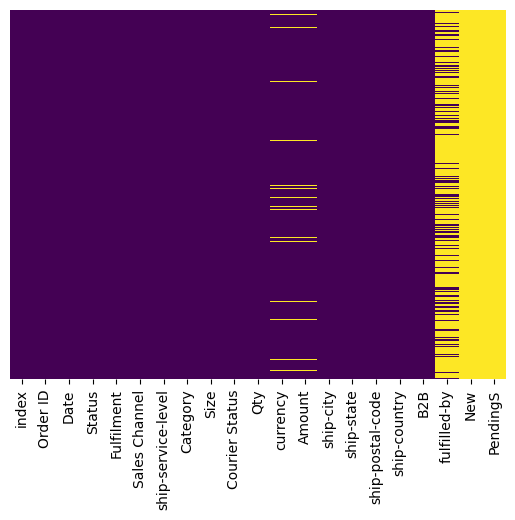

In [9]:
# checking missing values through heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  
plt.show()

In [10]:
# checking differnt values we got inside fulfilled-by column
df['fulfilled-by'].value_counts()

fulfilled-by
Easy Ship    39263
Name: count, dtype: int64

Observation:-
- As we can see it has only one type of value and rest in missing so it won't be relevant for our analysis.

In [11]:
# Dropping useless and blank Columns 
df.drop(['index','fulfilled-by', 'New', 'PendingS'],axis = 1, inplace = True )

In [12]:
# confirming changes
df.columns   # done

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [13]:
# # checking differnt values we got inside fulfilled-by column
df['currency'].value_counts()

currency
INR    121176
Name: count, dtype: int64

Observation:-
- Here the sales data is based on india so the currency is INR show will fill the currency.

In [14]:
# filling missing value for currency column
df['currency'] = df['currency'].fillna('INR')

In [15]:
#  filling missing value for Amount column with mean 
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [16]:
## removing missing values for following columns ['ship-city','ship-state','ship-postal-code','ship-country']
df.dropna(inplace = True)

In [17]:
# confirming changes
df.isna().sum()   # done

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [18]:
# checking dtypes of our features
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
dtype: object

Observation:-
- Here we can see data types of few columns are wrong like Date -> object instead of date need to fix it.

In [19]:
# fixing all the necessary columns dtype 

df['Date'] = pd.to_datetime(df['Date'])
df['ship-postal-code'] = df['ship-postal-code'].fillna(0).astype(int)
df['Amount'] = pd.to_numeric(df['Amount'])

In [68]:
# checking dtypes of our features
df.dtypes                  # done

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code               int32
ship-country                  object
B2B                             bool
Year                           int32
Month                         object
dtype: object

In [31]:
# checking categorcial columns
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
cat_col

['Order ID',
 'Status',
 'Fulfilment',
 'Sales Channel',
 'ship-service-level',
 'Category',
 'Size',
 'Courier Status',
 'currency',
 'ship-city',
 'ship-state',
 'ship-country']

In [32]:
# removing column we dont want to check coz they will repeat their values
cat_col.remove('Order ID')
cat_col.remove('Status')
cat_col.remove('Fulfilment')
cat_col.remove('Sales Channel')

cat_col

['ship-service-level',
 'Category',
 'Size',
 'Courier Status',
 'currency',
 'ship-city',
 'ship-state',
 'ship-country']

In [33]:
# printing the categorical columns data details and it's frequency
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

ship-service-level
ship-service-level
Expedited    88608
Standard     40333
Name: count, dtype: int64

Category
Category
T-shirt     50280
Shirt       49858
Blazzer     15499
Trousers    10613
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64

Size
Size
M       22366
L       21796
XL      20545
XXL     17803
S       16770
3XL     14642
XS      11055
Free     2251
6XL       738
5XL       550
4XL       425
Name: count, dtype: int64

Courier Status
Courier Status
Shipped       109458
On the Way      6867
Unshipped       6678
Cancelled       5938
Name: count, dtype: int64

currency
currency
INR    128941
Name: count, dtype: int64

ship-city
ship-city
BENGALURU                11208
HYDERABAD                 8077
MUMBAI                    6125
NEW DELHI                 5792
CHENNAI                   5430
                         ...  
PERUMBALA                    1
SONGADH TAPI DISTRICT        1
oodlabari                    1


Observation:-
- Most of them data distributed orderly but for ship-city and ship-state we have to look closely.

In [49]:
df['ship-city'].value_counts().head(20)

ship-city
BENGALURU        11208
HYDERABAD         8077
MUMBAI            6125
NEW DELHI         5792
CHENNAI           5430
PUNE              3863
KOLKATA           2380
GURUGRAM          1865
THANE             1701
LUCKNOW           1462
NOIDA             1421
GHAZIABAD         1328
NAVI MUMBAI       1263
AHMEDABAD         1230
JAIPUR             949
Hyderabad          918
Mumbai             869
COIMBATORE         766
PATNA              765
VISAKHAPATNAM      762
Name: count, dtype: int64

In [44]:
# checking ship-city
df['ship-city'].nunique()

8948

Observation:-
- We have repeated values for city due to upper and lower case since unique count is high we leave it as it is.

In [51]:
df['ship-state'].value_counts().head(20)

ship-state
MAHARASHTRA       22272
KARNATAKA         17324
TAMIL NADU        11488
TELANGANA         11330
UTTAR PRADESH     10646
DELHI              6778
KERALA             6577
WEST BENGAL        5962
ANDHRA PRADESH     5427
Gujarat            4482
HARYANA            4410
RAJASTHAN          2652
MADHYA PRADESH     2532
ODISHA             2115
BIHAR              2085
PUNJAB             1871
ASSAM              1664
UTTARAKHAND        1552
JHARKHAND          1457
GOA                1102
Name: count, dtype: int64

In [52]:
# checking ship-state
df['ship-state'].nunique()

69

In [53]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi',
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [54]:
# here will fix it
states = [
    ['AR', 'Arunachal Pradesh', 'Arunachal pradesh'],
    ['Bihar', 'bihar'],
    ['Chandigarh'],
    ['Delhi', 'delhi'],
    ['Goa', 'goa'],
    ['Gujarat'],
    ['Manipur'],
    ['Meghalaya'],
    ['Mizoram'],
    ['NL', 'Nagaland'],
    ['New Delhi'],
    ['Odisha', 'Orissa', 'orissa'],
    ['PB', 'Punjab', 'Punjab/Mohali/Zirakpur', 'punjab'],
    ['Pondicherry', 'Puducherry'],
    ['RJ', 'Rajasthan', 'Rajshthan', 'Rajsthan', 'rajasthan', 'rajsthan'],
    ['Sikkim']
]

# Create a dictionary for replacement
new_dict = {}
state_names = [
    'ARUNACHAL PRADESH', 'BIHAR', 'CHANDIGARH', 'DELHI', 'GOA', 'GUJARAT',
    'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'NEW DELHI', 'ODISHA', 
    'PUNJAB', 'PUDUCHERRY', 'RAJASTHAN', 'SIKKIM'
]

# Populate the replacement dictionary
for i, names in enumerate(states):
    for name in names:
        new_dict[name] = state_names[i]

# Replace values in the 'ship-state' column
df['ship-state'] = df['ship-state'].replace(new_dict)

In [55]:
# confirming changes
df['ship-state'].nunique()  # done

38

In [56]:
df['ship-state'].unique() # done

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'ANDAMAN & NICOBAR',
       'MIZORAM', 'NEW DELHI', 'LAKSHADWEEP', 'APO'], dtype=object)

# Creation of New Attributes

In [60]:
# extracting year from our date column
df['Year'] = df['Date'].dt.year
df['Year']

0         2022
1         2022
2         2022
3         2022
4         2022
          ... 
128971    2022
128972    2022
128973    2022
128974    2022
128975    2022
Name: Year, Length: 128941, dtype: int32

In [61]:
# extracting month from our date column
df['Month'] = df['Date'].dt.month
df['Month']

0         4
1         4
2         4
3         4
4         4
         ..
128971    5
128972    5
128973    5
128974    5
128975    5
Name: Month, Length: 128941, dtype: int32

In [63]:
# checiking how many months data we got
df['Month'].value_counts()  

Month
4    49053
5    42028
6    37689
3      171
Name: count, dtype: int64

In [65]:
# replacing numerical month with month name
df['Month'] = df['Month'].map({3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June'})

In [69]:
# final data overview
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Year,Month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,2022,April
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,2022,April
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,2022,April
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,2022,April
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,2022,April


# EXPLORATORY DATA ANALYSIS

Next, we can look at some descriptive statistics of the data frame with the describe method.

This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

- Row count, which aligns to what the shape attribute showed us.
- The mean, or average.
- The standard deviation, or how spread out the data is.
- The minimum and maximum value of each column
- The number of items that fall within the first, second, and third percentiles.

In [57]:
# Generating descriptive statistics summary for logical columns
df[['Qty','Amount']].describe()

,Qty,Amount
count,128941.000000,128941.000000
mean,0.904414,648.575985
std,0.313356,272.561217
min,0.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,635.000000
75%,1.000000,771.000000
max,15.000000,5584.000000


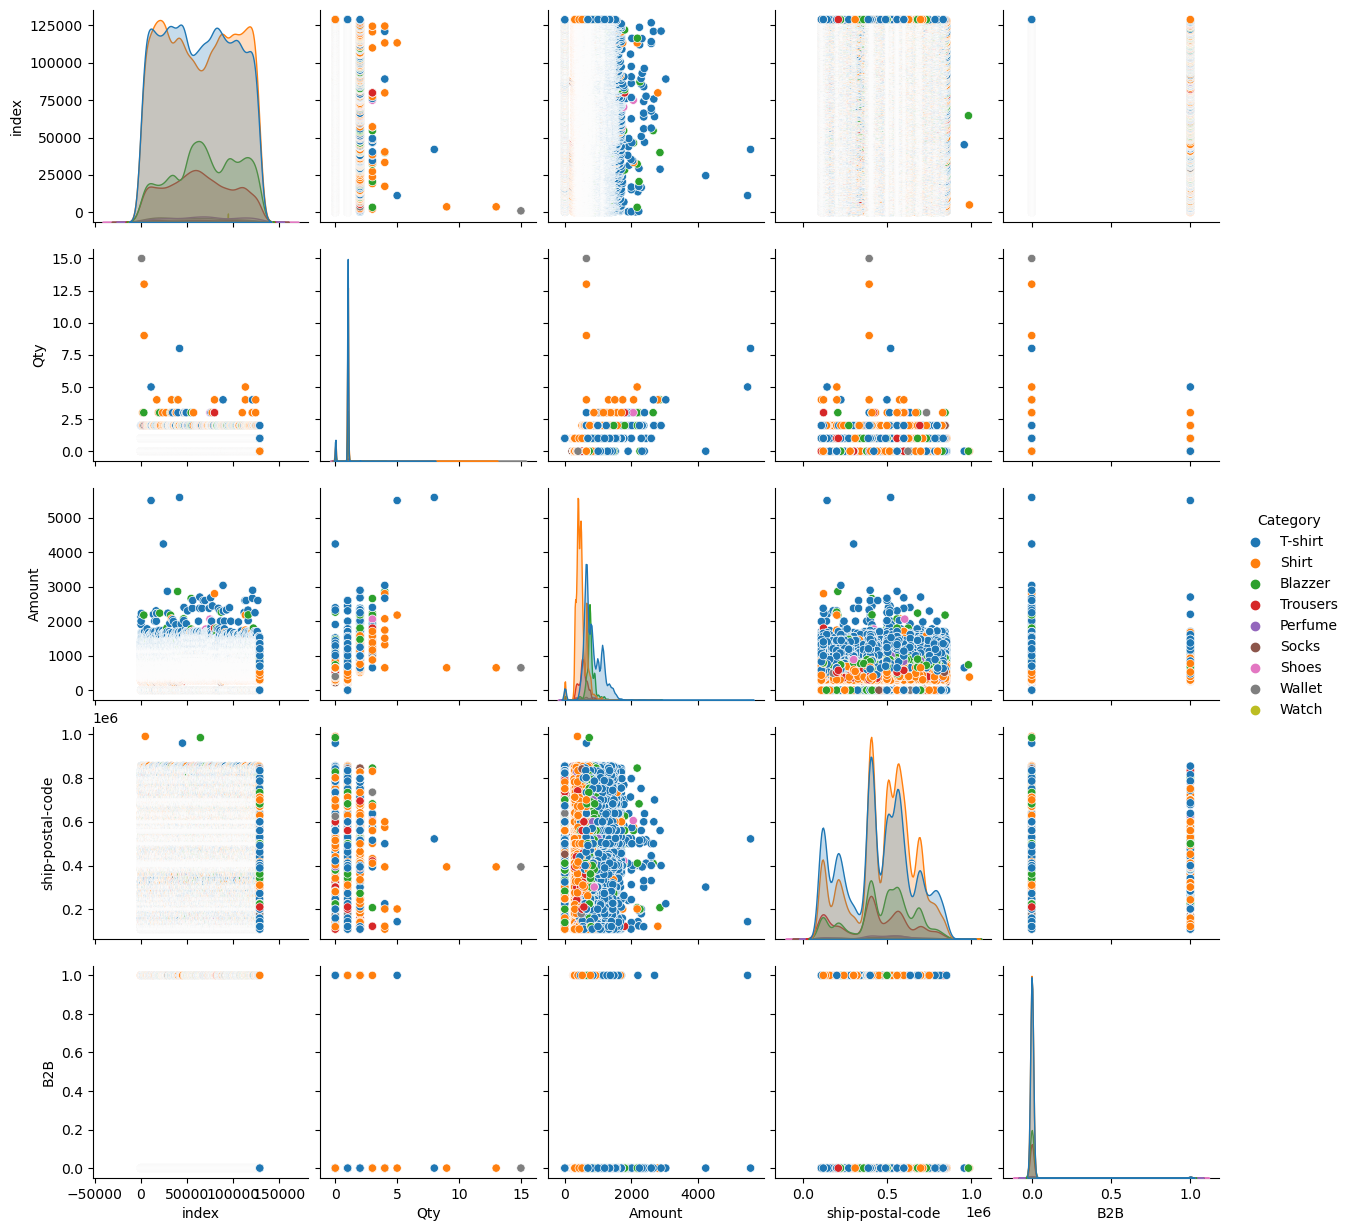

In [58]:
# Visualization to see which pairs of column we can use
df1 = df.reset_index() 
sns.pairplot(df1, hue = 'Category')

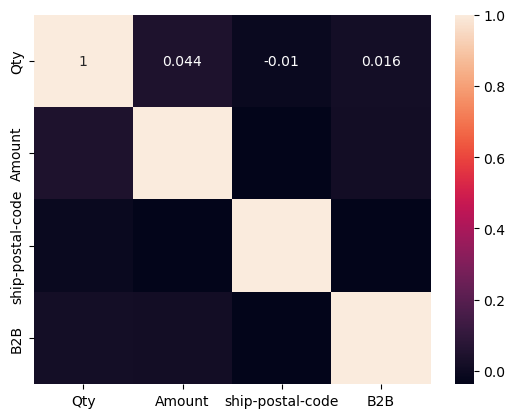

In [59]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

Observation:-
- We can see our columns are mostly negatively correlated.

WHAT IS THE OVERALL SALES TREND?

In [78]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'Year', 'Month'],
      dtype='object')

In [111]:
# grouping day wise sales
df_temp = df.groupby('Date')['Amount'].sum().round().reset_index()
df_temp

,Date,Amount
0,2022-03-31,107521.0
1,2022-04-01,935523.0
2,2022-04-02,977309.0
3,2022-04-03,1075971.0
4,2022-04-04,941078.0
...,...,...
86,2022-06-25,694445.0
87,2022-06-26,808632.0
88,2022-06-27,750444.0
89,2022-06-28,821376.0


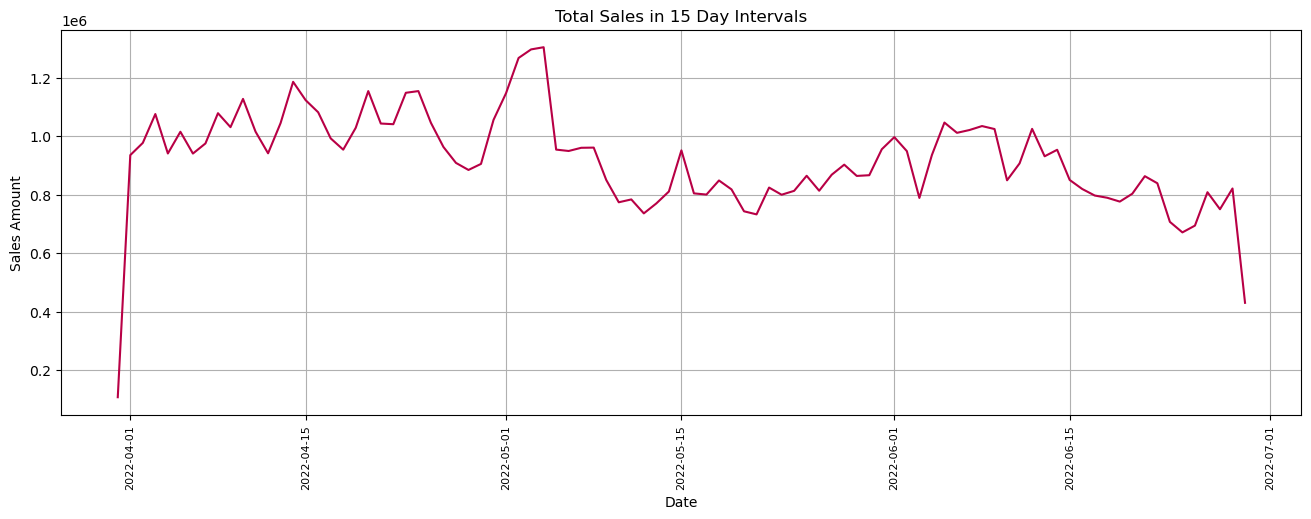

In [113]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['Date'], df_temp['Amount'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.title('Total Sales in 15 Day Intervals')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

Observation:-
- Seasonal Trend:
   - Sales rise at the start of May and then gradually decline.
   - The two major peaks align with specific events: a summer sale in May and another peak around the end of June.


- Summer Sale in May:
  - During May, customers seem to be purchasing products related to summer, such as summer clothing, and other seasonal items.
  - Capitalizing on this trend, we could plan targeted promotions or discounts for summer-related products during this period.


- Second Peak in June:
  - The second peak around the end of June suggests another surge in sales.
  - It could be due to an end-of-season sale or perhaps a monsoon-related promotion.


- Recommendations:
  - Product Promotions: 
    - Leverage the seasonal trends by running marketing campaigns and promotions during the lower sales periods. Highlight relevant products to attract customers.
  - Seasonal Products:
    - Consider offering discounts on items that are popular during specific times of the year. For example, promote rain gear during monsoon season.

In [135]:
# grouping month_year by sales
df_temp = df.groupby('Month')['Amount'].sum().round().reset_index()
df_temp

,Month,Amount
0,April,30776071.0
1,June,24901242.0
2,March,107521.0
3,May,27843202.0


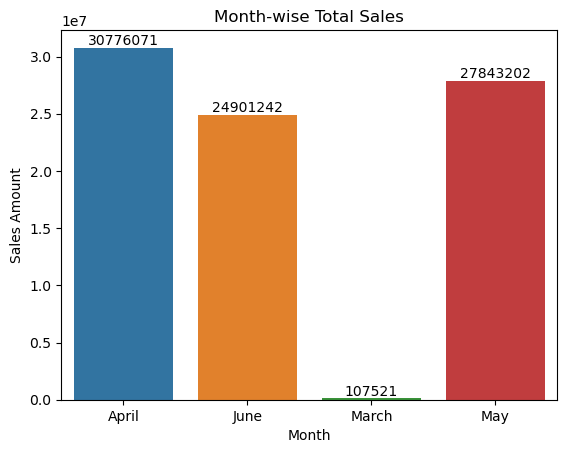

In [183]:
ax = sns.barplot(x='Month', y='Amount', data=df_temp)

# alternative
# Add labels to the bars (integer values)
# ax.bar_label(ax.containers[0], fmt='%.0f')  # Display integers

# Add labels to the bars (integer values)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f')

# Customize plot attributes
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')

# Show the plot
plt.show()

Observation:-
 - Findings and Insights:
   - The bar graph shows monthly sales data.
   - March appears to have lower sales, likely because the data starts late in the month.
   - In April, sales significantly increased. This could be due to summer holidays, prompting people to buy new items like clothes.

- Recommendations:
  - Stay Stocked Up: 
    - Given the unexpected sales hike during April to June, ensure your inventory is well-stocked during this period.
  - Seasonal Products: 
    - Consider adding more seasonal items to your inventory. For summer, think about including products like sunscreen.

In [130]:
# grouping year by sales
df_temp = df.groupby('Year')['Amount'].sum().round().reset_index()
df_temp

,Year,Amount
0,2022,83628036.0


Observation:-
 - As we have only 1 year data so we couldn't do much with it

# Product Analysis

## Product by Category

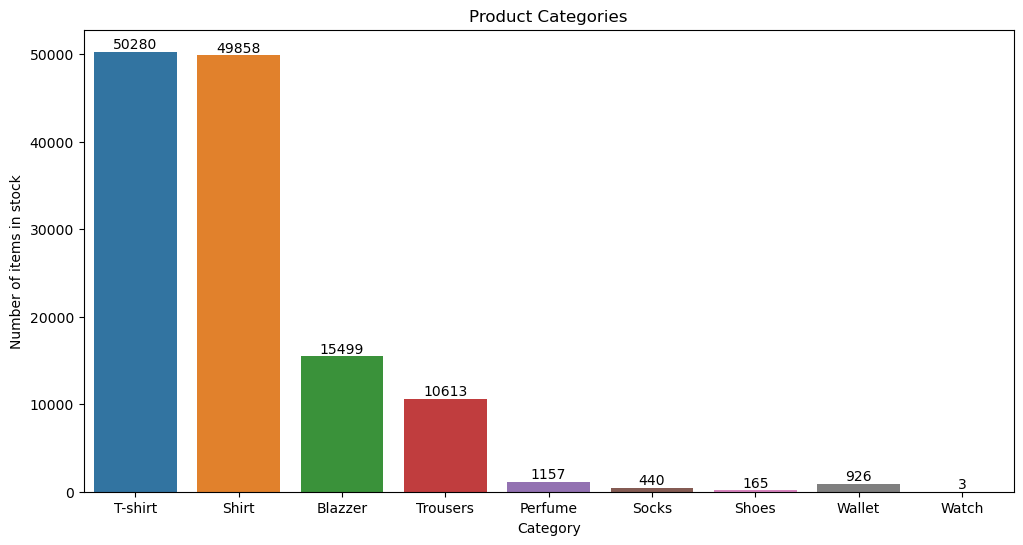

In [141]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'Category',data = df)
plt.title('Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of items in stock')
for bars in ax.containers:
    ax.bar_label(bars)

Observation:-
 - Top-Selling Products: T-Shirts and Shirts
    - T-Shirts and Shirts are driving high sales, which is excellent. Consider maintaining a fresh and diverse inventory for these items to keep customers engaged.
    - Monitor trends and adapt your offerings to match customer preferences. Are there specific colors, designs, or styles that perform exceptionally well? Use this information to guide your inventory decisions.
 - Low-Revenue Products: Wallets, Watches, Socks, and Shoes
   - These accessory products are generating less revenue. Here are some suggestions:
      - Supplier Evaluation: As you mentioned, consider exploring alternative suppliers for these items. Look for brands that resonate with your target audience.
      - Market Research: Investigate customer demand for these accessories. Are there specific features (e.g., durability, design) that customers value? Adjust your offerings accordingly.
      - Promotions: Run targeted promotions or bundles to boost sales. For example, pair socks with shoes or offer discounts on wallet-and-watch sets.

 - Trousers and Blazers
    - Trousers seem to be performing well when paired with topwear. Keep monitoring this relationship and adjust inventory levels accordingly.              - Blazers, on the other hand, have lower sales due to infrequent occasions for wearing. Consider marketing blazers for specific events (e.g., weddings, formal gatherings) or diversifying your blazer styles to appeal to a broader audience.
 - Evergreen Inventory Management
   - Your recommendation to keep Shirts and T-Shirts inventory fresh and evergreen is spot-on! Regularly introduce new designs while ensuring that           classic styles remain available.
   - Consider seasonal variations (e.g., summer vs. winter) and plan inventory accordingly. Collaborate with your team to forecast demand and optimize       stock levels.                                                                                      

## Product by Size

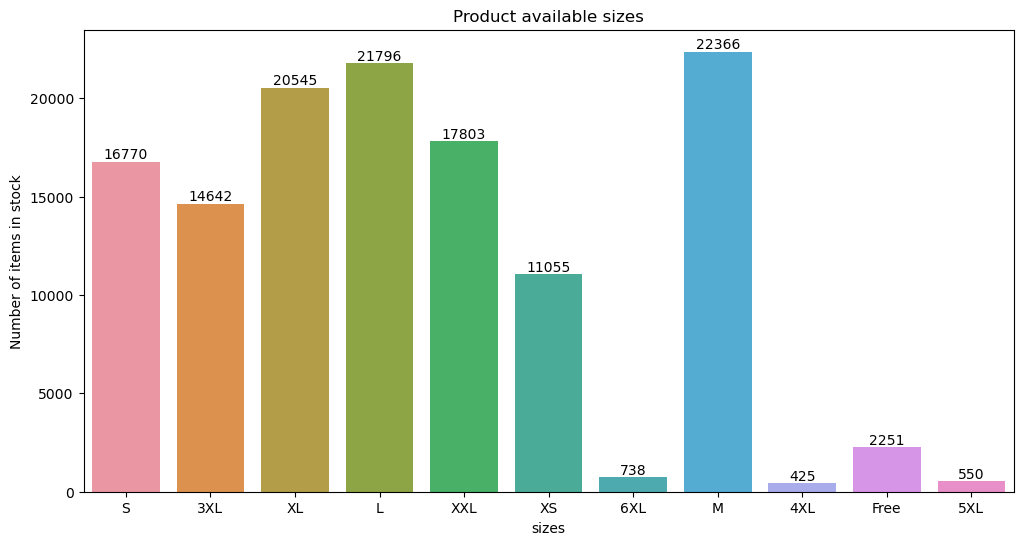

In [184]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'Size',data = df)
plt.title('Product available sizes')
plt.xlabel('sizes')
plt.ylabel('Number of items in stock')
for bars in ax.containers:
    ax.bar_label(bars)

Observation:-
 - Popular Sizes: M, L, XL, XXL, S, and 3XL
    - These sizes are in high demand, which is great! Customers prefer these options, so ensure that you maintain a robust inventory for them.
    - Monitor trends—do certain sizes perform better during specific seasons or events? Adjust your stock levels accordingly.
 - Less Common Sizes: Free, 4XL, 5XL, and 6XL
    - These sizes have lower sales. Here’s how you can address this
       - On-Demand Ordering: Instead of storing excess inventory for less popular sizes, work with your supplier to provide these sizes on demand. When a customer places an order, you can fulfill it promptly.
       - New Product Offerings: Consider introducing new products specifically tailored to these less common sizes. For example, create unique designs or styles that cater to 4XL, 5XL, and 6XL customers.
 - Inventory Management Strategy
   - Regularly review your inventory data. If a particular size consistently underperforms, adjust your stock levels accordingly.
   - Collaborate with your team to forecast demand and optimize inventory. Remember, happy customers find their preferred sizes readily available!

## Quantity sold per category and size

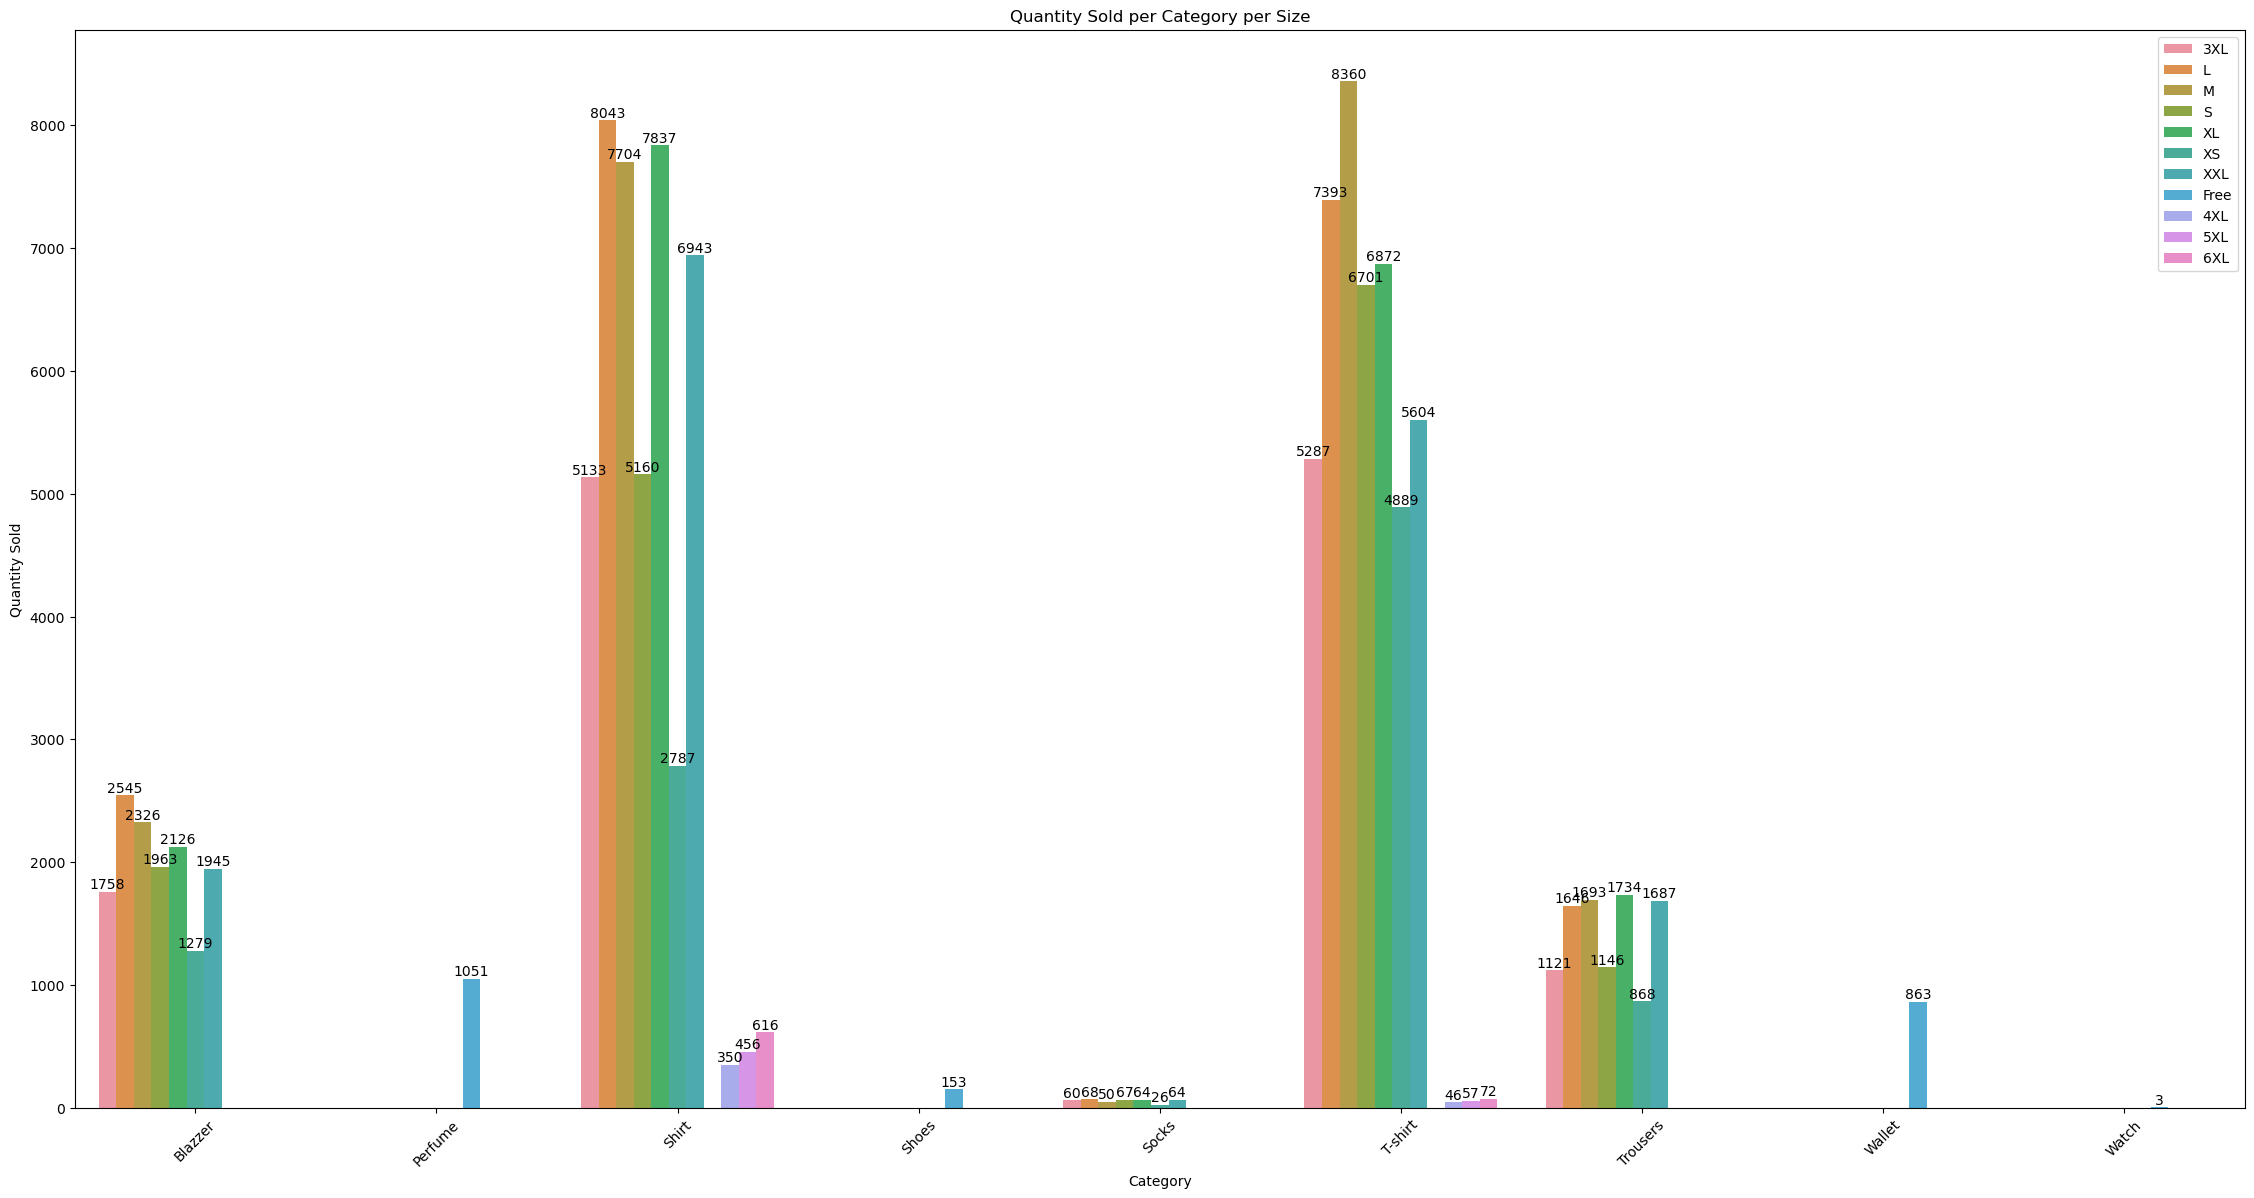

In [191]:
count_category_size=df.groupby(['Category','Size'])['Qty'].sum().reset_index()

plt.figure(figsize=(28, 14))
ax = sns.barplot(x='Category', y='Qty', hue='Size', data = count_category_size)
plt.title('Quantity Sold per Category per Size')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.legend(loc='upper right')
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Observation:-

  - Category-Specific Size Preferences:
    - You’ve rightly observed that certain product categories resonate differently with customers based on their body type or preferences. This               understanding is crucial for tailoring your invent
    - For example, if shoes, watches, and trousers are underperforming due to limited size availability, consider expanding your offerings in those           categories.
  - Recommendation: Diversify Size Options
    - Size Variety: Increase the choices available for less common sizes. By doing so, you’ll cater to a broader audience and potentially convert more        customers.
    - Permanent Customers: As you mentioned, providing a wide range of sizes can turn occasional buyers into loyal, repeat customers. When people find        their preferred size consistently available, they’re more likely to return.

# Fulfillment Analysis: 

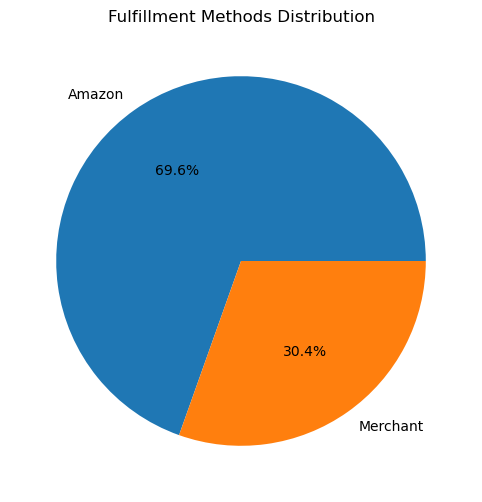

In [162]:
fulfillment_counts = df['Fulfilment'].value_counts().reset_index()
fulfillment_counts.columns = ['Fulfilment', 'Count']
plt.figure(figsize=(10, 6))
plt.pie( x='Count', data=fulfillment_counts, autopct='%1.1f%%',labels=fulfillment_counts['Fulfilment'])
plt.title('Fulfillment Methods Distribution')
plt.show()

Observations:-
 - Strengthen the Amazon Relationship:
    - Since Amazon handles the majority of your orders, consider building a strong partnership with them. Regular communication and collaboration can lead to better service and potential cost savings.
    - Explore Amazon’s additional services, such as FBA (Fulfillment by Amazon), which can streamline your logistics and enhance customer experience.
      Efficiency and Cost Reduction:
 - Leverage Amazon’s infrastructure to optimize fulfillment efficiency. Their vast distribution network and expertise can help you meet delivery expectations.
 - Monitor fulfillment costs. While Amazon is convenient, evaluate whether there are cost-effective alternatives for specific types of orders.

# Fulfilment Performance of Distributer by Delivery Status

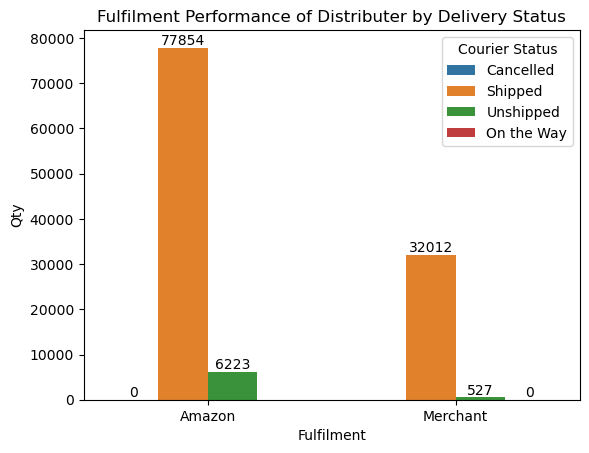

In [169]:
fulfilment_courier = df.groupby(['Fulfilment','Courier Status'])['Qty'].sum().reset_index()
fulfilment_courier.columns=['Fulfilment','Courier Status','Qty']
fulfilment_courier.value_counts()
ax = sns.barplot( x='Fulfilment',y='Qty', hue='Courier Status', data=fulfilment_courier)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Fulfilment Performance of Distributer by Delivery Status")
plt.show()

Observations:-
 - Amazon vs. Third-Party Merchants:
   - Amazon handles more packages overall, which aligns with its dominant market position.
   - The majority of Amazon’s packages fall into the “Shipped” and “Unshipped” categories, indicating efficient fulfillment.
   - A smaller portion of Amazon’s packages are either “Cancelled” or “On the way.”
 - Third-Party Merchants:
   - Third-party merchants show a similar distribution of delivery statuses, with most packages being “Shipped” and “Unshipped.”
   - However, there are also instances of “Cancelled” and “Unshipped” packages from third-party merchants.
 - Recommendation: Amazon as Fulfillment Provider:
   - Given Amazon’s reliability and robust after-sales services, consider using them exclusively for fulfillment.
   - This approach benefits both merchants (reduced costs) and customers (reliable service).

# Fulfilment Performance of Distributer by Product Catagory

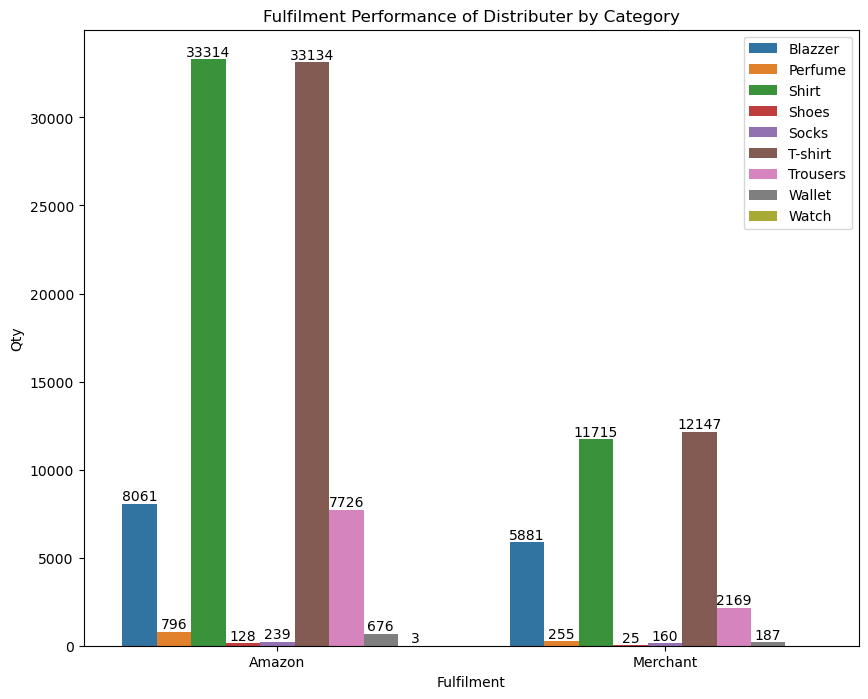

In [204]:
fulfilment_Category = df.groupby(['Fulfilment','Category'])['Qty'].sum().reset_index()

plt.figure(figsize=(10, 8))
fulfilment_Category.value_counts()
ax = sns.barplot( x='Fulfilment',y='Qty', hue='Category', data = fulfilment_Category)
plt.legend(loc='upper right')
plt.title("Fulfilment Performance of Distributer by Category")

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Observations:-
 - Recommendation: Enhance Customer Support

   - Third-party merchants should prioritize improving customer support. Excellent service can enhance customer satisfaction, loyalty, and overall business success.
   - Consider investing in training, efficient communication channels, and prompt issue resolution.

# Courier Distribution Status

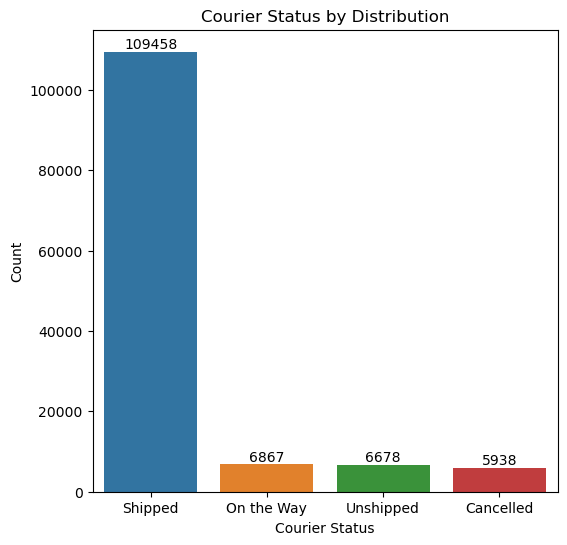

In [211]:
courier_status_counts = df['Courier Status'].value_counts().reset_index()
courier_status_counts.columns = ['Courier Status', 'Count']
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Courier Status', y='Count', data = courier_status_counts)
plt.title('Courier Status by Distribution')
plt.xlabel('Courier Status')
plt.ylabel('Count')


for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Observations:
  - Recomendations:
    - have to find more effective way to pick canncelled item first

# Customer Segmentation

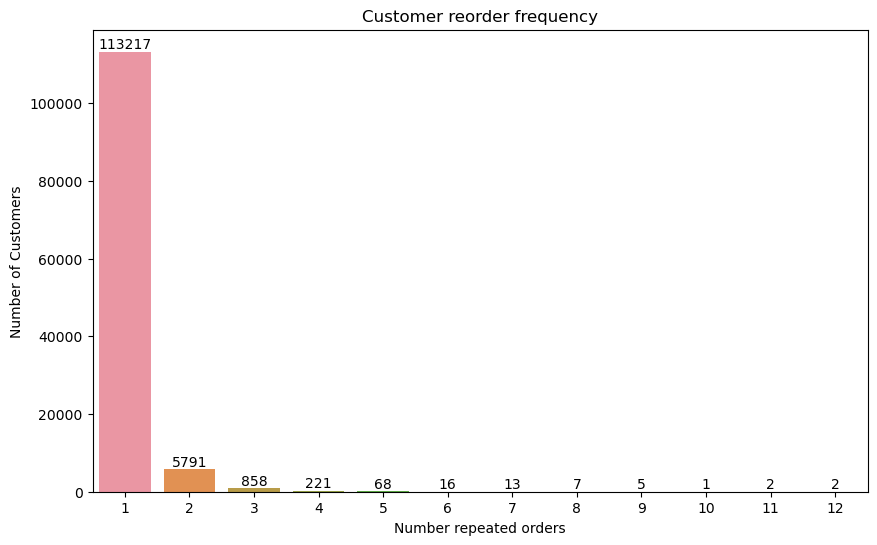

In [217]:
customer_reorder = df['Order ID'].value_counts().reset_index()
customer_reorder.columns = ['Order ID', 'Frequency']

reorder_frequency= customer_reorder['Frequency'].value_counts().reset_index()
reorder_frequency.columns = ['Frequency', 'Count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Frequency', y='Count', data=frequency_distribution)
plt.title('Customer reorder frequency')
plt.xlabel('Number repeated orders')
plt.ylabel('Number of Customers')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Observations:-
 - Purchase Frequency Insights:
   - It appears that most customers make a single purchase (one-time buyers). This finding highlights an opportunity to encourage repeat business.
   - Recurring customers contribute significantly to long-term revenue and brand loyalty. Focusing on retention can be beneficial.
 - Recommendation: Encourage Repeat Purchases
   - Loyalty Discounts: Consider implementing a loyalty program. After a customer’s initial purchase, offer them a discount on their next order. This incentive can motivate repeat buying.
   - Personalized Offers: Tailor promotions based on individual preferences. Send personalized emails with exclusive discounts or product recommendations.
   - Engagement: Engage with customers post-purchase. Request feedback, share relevant content, and keep them informed about new arrivals or special events.

# Average order Valye by Customers

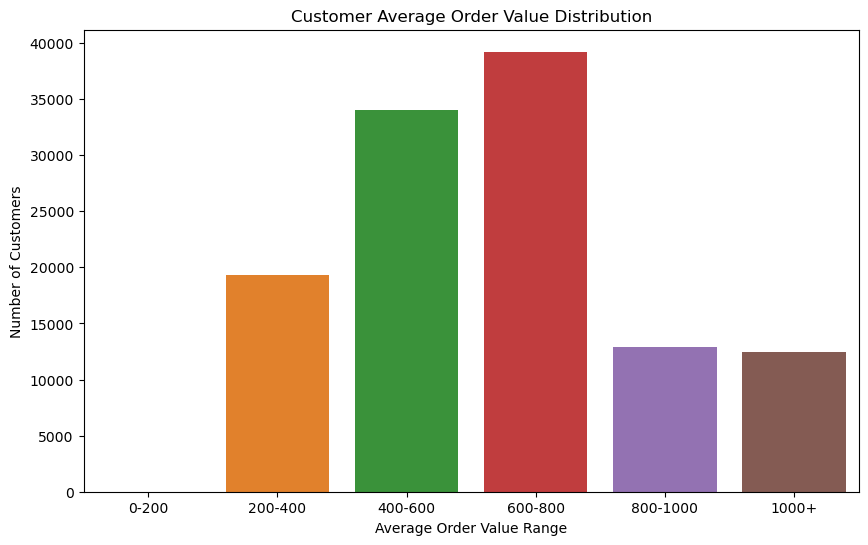

In [220]:
avg_order_value = df.groupby('Order ID')['Amount'].mean().reset_index()
avg_order_value.columns = ['Order ID', 'Average Order Value']

# Bin the average order values into ranges
avg_order_value['Value Range'] = pd.cut(avg_order_value['Average Order Value'],
                                        bins=[0, 200, 400, 600, 800, 1000, float('inf')],
                                        labels=['0-200', '200-400', '400-600', '600-800', '800-1000', '1000+'])

# Aggregate by value range
value_range_counts = avg_order_value['Value Range'].value_counts().reset_index()
value_range_counts.columns = ['Value Range', 'Count']

# Plot the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x='Value Range', y='Count', data=value_range_counts)
plt.title('Customer Average Order Value Distribution')
plt.xlabel('Average Order Value Range')
plt.ylabel('Number of Customers')
plt.show()

Observations:-
  - Average Order Value Insights:
     - Most customers fall within the 400 to 600 range for their average order value. This suggests that products in this price range are popular.
     - The next peak occurs in the 600 to 800 range, indicating that customers are willing to spend a bit more for certain items.
  - Recommendations:     - 
Quality at Lower Price Points: Consider offering better quality products at lower price points. Customers appreciate value for their money, so          focus on the price-to-performance ratio
  - High-Value Product Management:
     - Stock Optimization: For high-value products, manage your inventory carefully. If they have low turnover, consider reducing stock levels to avoid        tying up capital.
     - On-Demand Import: Import high-value items based on customer orders. This minimizes excess inventory and ensures availability when needed..

# Geographical Analysis

# Order by State

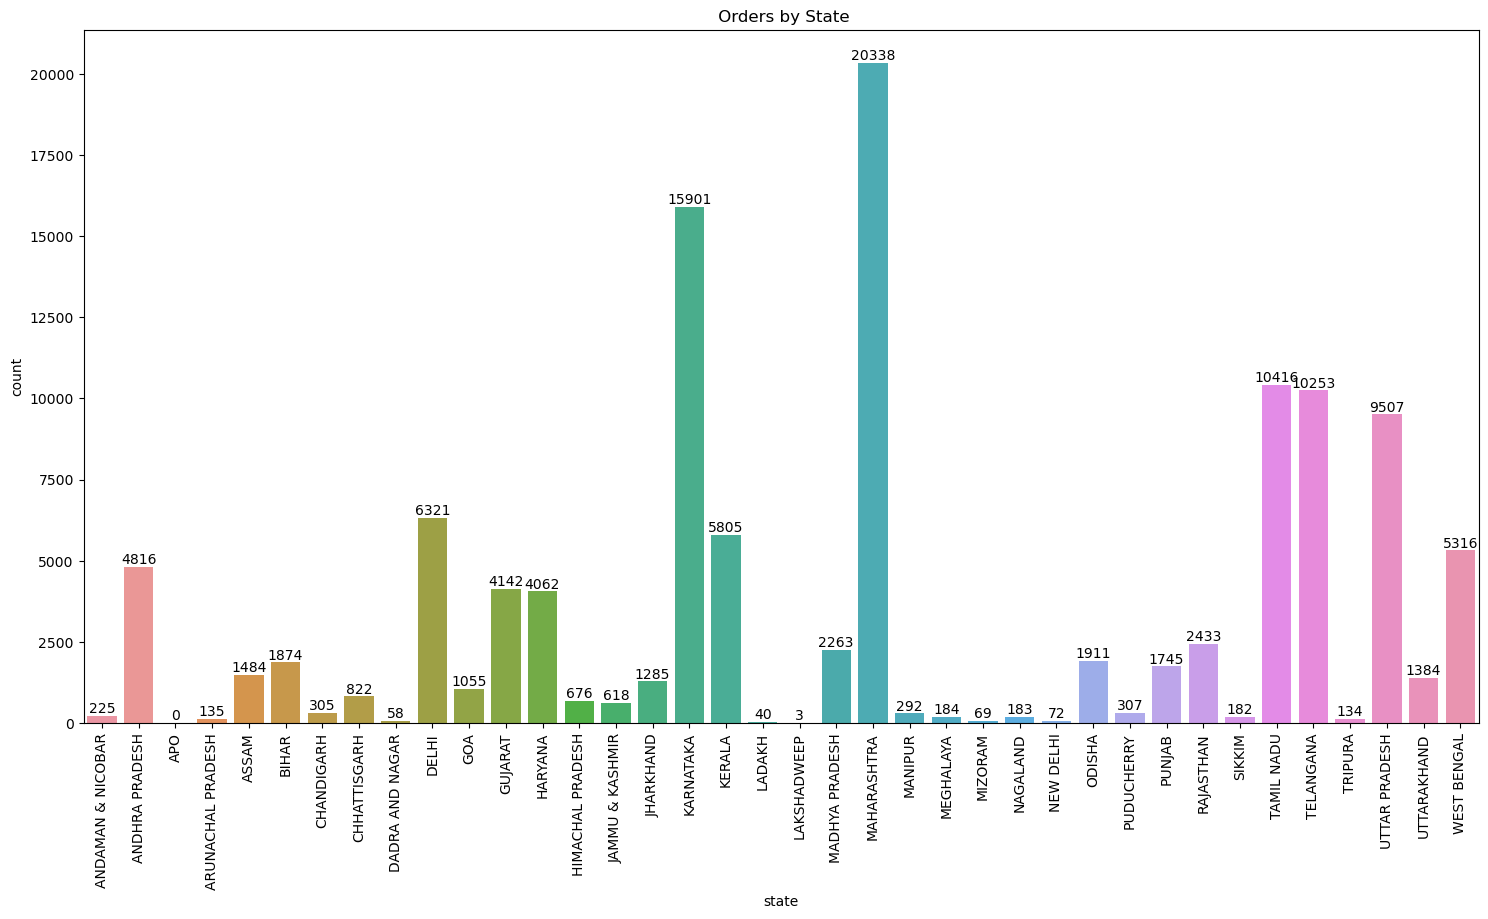

In [179]:
Salesgeo = df.groupby(['ship-state'])['Qty'].sum().reset_index()
Salesgeo.columns =['state','count']
fig ,ax = plt.subplots(figsize=(18,9))
sns.barplot(x = 'state',y='count',data = Salesgeo)
plt.title(" Orders by State")
plt.xticks(rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Observations:-
 - High-Purchase States: Maharashtra and Karnataka
   - These states show significant purchase activity. Consider analyzing the reasons behind their popularity—demographics, marketing efforts, or local preferences.
   - Tailor your strategies to maintain and potentially increase sales in these regions.
 - Low-Purchase States (Remote Areas)
   - The states with lower population and less purchase likely face challenges related to delivery accessibility.
   - Recommendation: Improve delivery options for remote areas. Explore partnerships with local logistics providers or optimize existing delivery networks.